# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Строительство', 'Транспорт', 'Банк/Финансы', 'Информационные технологии', 'Нефтегазовая промышленность', 'Наука', 'Сборочные производства', 'Туризм', 'Развлечения/Искусство', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Информационные услуги', 'Здравоохранение', 'Торговля', 'Маркетинг', 'Подбор персонала', 'Энергетика', 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Образование', 'Недвижимость', 'Юридические услуги/нотариальные услуги', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть и с ними можно поступить двумя вариантами- заполнить или удалить. Я все-таки за заполнение в данном случае, так как ряд пустых параметров можно сгруппировать в признаки, например
1 - получал / не получал ранее кредит
2 - работает / не работает. 

Более детально по пустым параметрам:
* GEN_INDUSTRY                   2713
* GEN_TITLE                      2713
* ORG_TP_STATE                   2713
* ORG_TP_FCAPITAL                2708
* JOB_DIR                        2713
* WORK_TIME                      2717

Данные пропуски свидетельсвуют о том, что нет данных о месте работы, что может свидетельствовать о том, что клиент банка "не работает"

* TP_PROVINCE                     590

Место, где получал кредит, соответственно, пустое значение может говорить нам о том, что клиент ранее кредит не брал в купе с другими параметрами и можно выделить в отдельный параметр

* PREVIOUS_CARD_NUM_UTILIZED    29533
Были ли выданы карты, соответсвенно, можно заполнить 0 если карты ранее не получали



In [15]:
print(df.isnull().sum()) # проверяем количество пропусков

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

При помощи функции pd.get_dummies можно разбить категориальные признаки. Признаки присутствуют, например:
* EDUCATION
* MARITAL_STATUS
* GEN_INDUSTRY
* GEN_TITLE
* ORG_TP_STATE
* ORG_TP_FCAPITAL
* JOB_DIR
* FAMILY_INCOME
* REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE и FACT_ADDRESS_PROVINCE, REGION_NM - географические признаки
* TP_PROVINCE - можно изменить и выделить в отдельный столбец, так как  пустое значение означает, что клиент не брал кредит

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    #Удаляем идентификатор AGREEMENT_RK
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #Избавляемся от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Работаем с пропусками: параметры, которые относятся к работе, заменяем на "Возможно не работал"
    df_output.loc[(df_output['GEN_INDUSTRY'].isnull()), 'GEN_INDUSTRY'] = 'Возможно не работал'
    df_output.loc[(df_output['GEN_TITLE'].isnull()), 'GEN_TITLE'] = 'Возможно не работал'
    df_output.loc[(df_output['ORG_TP_STATE'].isnull()), 'ORG_TP_STATE'] = 'Возможно не работал'
    df_output.loc[(df_output['ORG_TP_FCAPITAL'].isnull()), 'ORG_TP_FCAPITAL'] = 'Возможно не работал'
    df_output.loc[(df_output['JOB_DIR'].isnull()), 'JOB_DIR'] = 'Возможно не работал'

    # Работаем с пропусками: TP_PROVINCE - если пустое, возможно, человек не брал ранее кредит
    df_output['CREDIT_CLIENT'] = ~df_output['TP_PROVINCE'].isnull()
    
    # Работаем с пропусками: WORK TIME - если пустое, человек не работал
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    
    # Работаем с пропусками: PREVIOUS_CARD_NUM_UTILIZED - если пустое, не получал ранее кредит
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    # Работаем с пропусками: REGION_NM - регион РФ, соответсвенно, пробуем заполнить на основании географических параметров.
    df_output[df_output.REGION_NM.isnull()].fillna(value=df_input.REGION_NM[~df_input['REGION_NM'].isnull() &
                                                         (df_input['FACT_ADDRESS_PROVINCE'] == df_output['FACT_ADDRESS_PROVINCE'])].iloc[0], inplace=True)
    
    print(df_output['REGION_NM'].describe())
    df_output = df_output.drop(['TP_PROVINCE'], axis=1)
 
    #Кодируем категориальные признаки: 
    #EDUCATION
    #MARITAL_STATUS
    #GEN_INDUSTRY
    #GEN_TITLE
    #ORG_TP_STATE
    #ORG_TP_FCAPITAL
    #JOB_DIR,
    #FAMILY_INCOME
    #REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, REGION_NM - географические признаки
    #TP_PROVINCE - выделяем в отдельную колонку, так как является новым признаком - брал или не брал кредит 

    EDUCATION_2 = list(set(df_output['EDUCATION']))
    df_output['EDUCATION'] = df_output.EDUCATION.apply(lambda r: EDUCATION_2.index(r))
    
    MARITAL_STATUS_2 = list(set(df_output['MARITAL_STATUS']))
    df_output['MARITAL_STATUS'] = df_output.MARITAL_STATUS.apply(lambda r: MARITAL_STATUS_2.index(r))    
    
    GEN_INDUSTRY_2 = list(set(df_output['GEN_INDUSTRY']))
    df_output['GEN_INDUSTRY'] = df_output.GEN_INDUSTRY.apply(lambda r: GEN_INDUSTRY_2.index(r))   
    
    GEN_TITLE_2 = list(set(df_output['GEN_TITLE']))
    df_output['GEN_TITLE'] = df_output.GEN_TITLE.apply(lambda r: GEN_TITLE_2.index(r)) 
    
    ORG_TP_STATE_2 = list(set(df_output['ORG_TP_STATE']))
    df_output['ORG_TP_STATE'] = df_output.ORG_TP_STATE.apply(lambda r: ORG_TP_STATE_2.index(r))     
    
    ORG_TP_FCAPITAL_2 = list(set(df_output['ORG_TP_FCAPITAL']))
    df_output['ORG_TP_FCAPITAL'] = df_output.ORG_TP_FCAPITAL.apply(lambda r: ORG_TP_FCAPITAL_2.index(r))      
    
    JOB_DIR_2 = list(set(df_output['JOB_DIR']))
    df_output['JOB_DIR'] = df_output.JOB_DIR.apply(lambda r: JOB_DIR_2.index(r))      
    
    FAMILY_INCOME_2 = list(set(df_output['FAMILY_INCOME']))
    df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.apply(lambda r: FAMILY_INCOME_2.index(r))      

    GEO = list(set().union(
        df_output['REG_ADDRESS_PROVINCE'], 
        df_output['FACT_ADDRESS_PROVINCE'], 
        df_output['POSTAL_ADDRESS_PROVINCE']))
    df_output['REG_ADDRESS_PROVINCE'] = df_output.REG_ADDRESS_PROVINCE.apply(lambda r: GEO.index(r))  
    df_output['FACT_ADDRESS_PROVINCE'] = df_output.FACT_ADDRESS_PROVINCE.apply(lambda r: GEO.index(r))  
    df_output['POSTAL_ADDRESS_PROVINCE'] = df_output.POSTAL_ADDRESS_PROVINCE.apply(lambda r: GEO.index(r))  
    
    REGION_NM_2 = list(set(df_output['REGION_NM']))
    df_output['REGION_NM'] = df_output.REGION_NM.apply(lambda r: REGION_NM_2.index(r))
    
    df_output = pd.get_dummies(df_output, columns=[
#         'EDUCATION',
#         'MARITAL_STATUS',
#         'GEN_INDUSTRY',
#         'GEN_TITLE',
#         'ORG_TP_STATE',
#         'ORG_TP_FCAPITAL',
#         'JOB_DIR',
#         'FAMILY_INCOME',
#         'REG_ADDRESS_PROVINCE',
#         'FACT_ADDRESS_PROVINCE',
#         'POSTAL_ADDRESS_PROVINCE',
#         'REGION_NM',
        'CREDIT_CLIENT'])
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

D:\Anakonda\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


count     30131
unique       11
top       ЮЖНЫЙ
freq       4248
Name: REGION_NM, dtype: object


In [18]:
print(df_preproc.isnull().sum()) # проверяем количество пропусков

TARGET                        0
AGE                           0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
GENDER                        0
CHILD_TOTAL                   0
DEPENDANTS                    0
EDUCATION                     0
MARITAL_STATUS                0
GEN_INDUSTRY                  0
GEN_TITLE                     0
ORG_TP_STATE                  0
ORG_TP_FCAPITAL               0
JOB_DIR                       0
FAMILY_INCOME                 0
PERSONAL_INCOME               0
REG_ADDRESS_PROVINCE          0
FACT_ADDRESS_PROVINCE         0
POSTAL_ADDRESS_PROVINCE       0
REGION_NM                     0
REG_FACT_FL                   0
FACT_POST_FL                  0
REG_POST_FL                   0
REG_FACT_POST_FL              0
REG_FACT_POST_TP_FL           0
FL_PRESENCE_FL                0
OWN_AUTO                      0
AUTO_RUS_FL                   0
HS_PRESENCE_FL                0
COT_PRESENCE_FL               0
GAR_PRESENCE_FL               0
LAND_PRE

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
## Your Code Here

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_Predict = DTC.predict(X_test)
DTC_PredictProba = DTC.predict_proba(X_test)

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_Predict = RFC.predict(X_test)
RFC_PredictProba = RFC.predict_proba(X_test)

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_Predict = LR.predict(X_test)
LR_PredictProba = LR.predict_proba(X_test)

In [24]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('DTC')
print('accuracy', accuracy_score(y_test, DTC_Predict))
print('precision', precision_score(y_test, DTC_Predict))
print('recall', recall_score(y_test, DTC_Predict))

print('RFC')
print('accuracy', accuracy_score(y_test, RFC_Predict))
print('precision', precision_score(y_test, RFC_Predict))
print('recall', recall_score(y_test, RFC_Predict))

print('LR')
print('accuracy', accuracy_score(y_test, LR_Predict))
print('precision', precision_score(y_test, LR_Predict))
print('recall', recall_score(y_test, LR_Predict))

DTC
accuracy 0.776671974522293
precision 0.15866666666666668
recall 0.19508196721311474
RFC
accuracy 0.8746019108280255
precision 0.20588235294117646
recall 0.011475409836065573
LR
accuracy 0.8779856687898089
precision 0.3333333333333333
recall 0.004918032786885246


Text(0.5,1,'Accuracy, Precision, Recall')

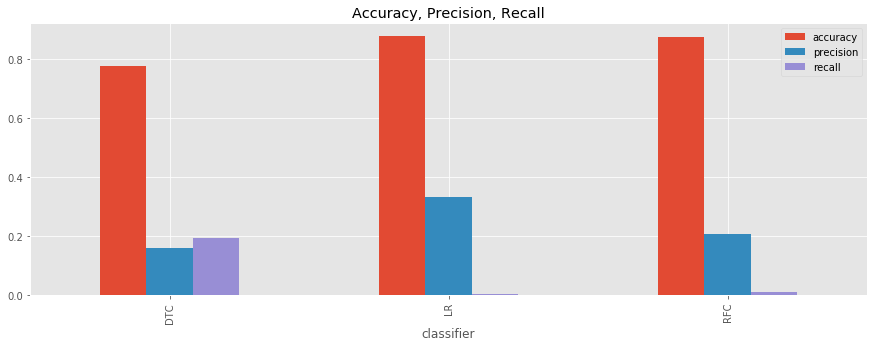

In [25]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
## Your Code Here
model_df = pd.DataFrame(data={
    'classifier': [
        'DTC', 'RFC', 'LR'
    ], 
    'accuracy': [
        accuracy_score(y_test, DTC_Predict),
        accuracy_score(y_test, RFC_Predict),
        accuracy_score(y_test, LR_Predict)
    ], 
    'precision': [
        precision_score(y_test, DTC_Predict),
        precision_score(y_test, RFC_Predict),
        precision_score(y_test, LR_Predict)
    ], 
    'recall': [
        recall_score(y_test, DTC_Predict),
        recall_score(y_test, RFC_Predict),
        recall_score(y_test, LR_Predict)
    ]})
_, ax = plt.subplots(figsize=(15, 5))
model_df.pivot_table(model_df, index=['classifier']).plot(kind='bar', stacked=False, ax=ax)
plt.title('Accuracy, Precision, Recall')

roc_auc_srore
DTC 0.5260638653464758
RFC 0.6206580032237218
LR 0.6409724646616206


Text(0.5,1,'roc-кривые')

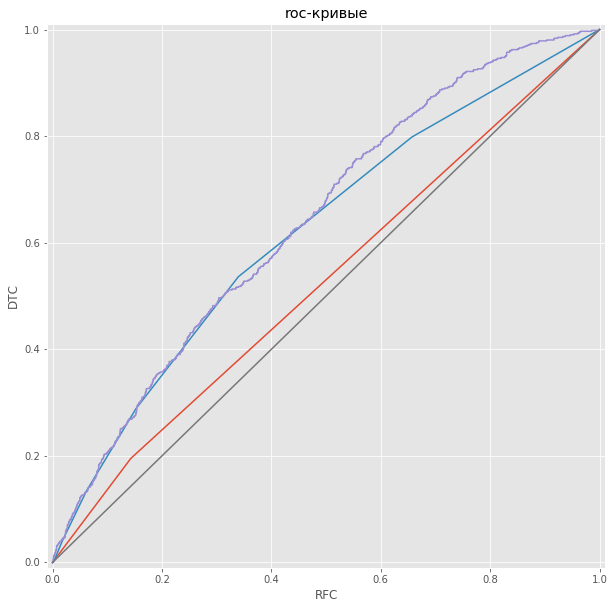

In [26]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

print('roc_auc_srore')
print('DTC', roc_auc_score(y_test, DTC_PredictProba[:,1]))
print('RFC', roc_auc_score(y_test, RFC_PredictProba[:,1]))
print('LR', roc_auc_score(y_test, LR_PredictProba[:,1]))

plt.figure(figsize=(10,10))
fpr, tpr, thresholds = roc_curve(y_test, DTC_PredictProba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RFC_PredictProba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, LR_PredictProba[:,1])
plt.plot(fpr, tpr, label='DTC')
plt.plot(fpr2, tpr2, label='RFC')
plt.plot(fpr3, tpr3, label='LR')
plt.plot([0, 1], [0, 1])
plt.ylabel('DTC')
plt.xlabel('RFC')
plt.grid(True)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.title('roc-кривые')

In [27]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
RFC = RandomForestClassifier()
df_cv=df_preproc.drop(['TARGET'], axis=1)
df_cv=df_preproc.drop(['sample'], axis=1)
y=df_preproc['TARGET']
cross_val_score(
    RFC,
    df_cv,
    y,
    scoring='roc_auc',
    cv=10)


D:\Anakonda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_PredictProba = LR.predict_proba(X_test) # взяли тетстовую выборку
print('LR')
print('precision', precision_score(y_test, LR_Predict))
print('recall', recall_score(y_test, LR_Predict))
print('accuracy', accuracy_score(y_test, LR_Predict))


LR
precision 0.3333333333333333
recall 0.004918032786885246
accuracy 0.8779856687898089


In [33]:
# Померить roc_auc на тесте
roc_auc_score(y_test, LR_PredictProba[:,1])

0.6409724646616206